# External Features

In [18]:
import pandas as pd

In [19]:
# Read in the data
train_stop = pd.read_csv('../distances_and_durations/train_old/train_distance_duration(final).csv')
school = pd.read_csv('../distances_and_durations/school_old/school_distance_duration(final).csv')
mall = pd.read_csv('../distances_and_durations/mall_old/mall_distances_durations(final).csv')
park = pd.read_csv('../distances_and_durations/park_old/park_distances_durations(final).csv')
CBD = pd.read_csv('../distances_and_durations/cbd_old/cbd_distances_durations(final).csv')
rent = pd.read_csv('../rent_data/rent_cleaned.csv')
train_stop_extra = pd.read_csv('../distances_and_durations/train_new/train_distance_duration(extra).csv')
school_extra = pd.read_csv('../distances_and_durations/school_new/school_distances_durations(extra).csv')
mall_extra = pd.read_csv('../distances_and_durations/mall_new/mall_distances_durations(extra).csv')
park_extra = pd.read_csv('../distances_and_durations/park_new/park_distances_durations(extra).csv')
CBD_extra = pd.read_csv('../distances_and_durations/cbd_new/cbd_distances_durations(extra).csv')
rent_extra = pd.read_csv('../rent_data/rent_extra.csv')
population_growth = pd.read_csv('../data/curated/population_postcode.csv')
affluence = pd.read_csv('../data/curated/VIC_weekly_income_poa.csv')

In [20]:
# Merge the data
train_stop = pd.concat([train_stop, train_stop_extra])
school = pd.concat([school, school_extra])
park = pd.concat([park, park_extra])
mall = pd.concat([mall, mall_extra])
CBD = pd.concat([CBD, CBD_extra])
rent = pd.concat([rent, rent_extra])

In [21]:
rent = rent.rename(columns={'listingSlug':'rent_address'})

# Select the columns we want
rent_1bathroom = rent[rent.bathrooms == 1]
rent_2bedroom = rent_1bathroom[rent_1bathroom.bedrooms == 2]
rent_1car_1bathroom_2bedrooms = rent_2bedroom[rent_2bedroom.carspaces == 1]

print(rent_1car_1bathroom_2bedrooms.shape)

(477, 14)


### Inverse index

In [22]:
# inverse the duration
park["min_duration"]=1/(park["min_duration"]/60)
mall["min_duration"]=1/(mall["min_duration"]/60)
school["min_duration"]=1/(school["min_duration"]/60)
train_stop["min_duration"]=1/(train_stop["min_duration"]/60)
CBD["min_duration"]=1/(CBD["min_duration"]/60)

In [23]:
# inverse the distance
park["min_distance"]=1/park["min_distance"]
mall["min_distance"]=1/mall["min_distance"]
school["min_distance"]=1/school["min_distance"]
train_stop["min_distance"]=1/train_stop["min_distance"]
CBD["min_distance"]=1/CBD["min_distance"]

### Rename Column name

In [24]:
# rename the columns
school = school.rename(columns={'min_distance':'school_distance(m)', 'min_duration':'school_duration(min)'})
mall = mall.rename(columns={'min_distance':'mall_distance(m)', 'min_duration':'mall_duration(min)'})
park = park.rename(columns={'min_distance':'park_distance(m)', 'min_duration':'park_duration(min)'})
train_stop = train_stop.rename(columns={'min_distance':'train_stop_distance(m)', 'min_duration':'train_stop_duration(min)'})
population_growth = population_growth.rename(columns={'Postcode':'postcode','average change %':'population_growth_rate','2022':'population predicted in 2022'})
CBD = CBD.rename(columns={'min_distance':'CBD_distance(m)', 'min_duration':'CBD_duration(min)'})
affluence = affluence.rename(columns={'Postcode':'postcode'})

### Calculate average of diatance and duration

In [25]:
# group the data
school = school[['postcode', 'school_distance(m)', 'school_duration(min)']].groupby('postcode').mean()
school = school.reset_index(drop=False)

mall = mall[['postcode', 'mall_distance(m)', 'mall_duration(min)']].groupby('postcode').mean()
mall = mall.reset_index(drop=False)

park = park[['postcode', 'park_distance(m)', 'park_duration(min)']].groupby('postcode').mean()
park = park.reset_index(drop=False)

CBD = CBD[['postcode', 'CBD_distance(m)', 'CBD_duration(min)']].groupby('postcode').mean()
CBD = CBD.reset_index(drop=False)

train_stop = train_stop[['postcode', 'train_stop_distance(m)', 'train_stop_duration(min)']].groupby('postcode').mean()
train_stop = train_stop.reset_index(drop=False)

### Merge each external feature with mean value

In [26]:
# merge the data
rent_school = pd.merge(rent_1car_1bathroom_2bedrooms, school, how='inner', on='postcode')
mall_park = pd.merge(mall, park, how='inner', on='postcode')
population_forecast_affluence = pd.merge(population_growth[['postcode','population density 2022']],affluence[['postcode','Median weekly income in 2022']],how='inner', on='postcode')
combine_df1 = pd.merge(rent_school, mall_park, how='inner', on='postcode')
train_cbd = pd.merge(train_stop, CBD, how='inner', on='postcode')
combine = pd.merge(combine_df1, train_cbd, how='inner', on='postcode')
external_feature = pd.merge(combine, population_forecast_affluence, how='inner', on='postcode')

In [27]:
print(rent_school.shape)
print(mall_park.shape)
print(combine_df1.shape)
print(combine.shape)
print(external_feature.shape)
print(population_forecast_affluence.shape)

(477, 16)
(163, 5)
(477, 20)
(477, 24)
(302, 26)
(571, 3)


In [28]:
external_feature

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,...,mall_distance(m),mall_duration(min),park_distance(m),park_duration(min),train_stop_distance(m),train_stop_duration(min),CBD_distance(m),CBD_duration(min),population density 2022,Median weekly income in 2022
0,20,420.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
1,967,625.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
2,280,600.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
3,295,490.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
4,621,495.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,EAST MELBOURNE,3002,...,0.000730,0.306374,0.000490,0.226417,0.000240,0.117301,0.000158,0.081265,1737.0,1626.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,563,380.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,CLAYTON SOUTH,3169,...,0.000223,0.108064,0.000226,0.122390,0.000038,0.029651,0.000041,0.029711,1842.0,1059.19
298,623,425.0,VIC,ApartmentUnitFlat,1,2,1,Eastern Suburbs,RINGWOOD EAST,3135,...,0.000451,0.261757,0.000237,0.152979,0.000032,0.029486,0.000030,0.026410,2288.0,1171.37
299,693,500.0,VIC,ApartmentUnitFlat,1,2,1,Melbourne Region,WILLIAMSTOWN NORTH,3016,...,0.000137,0.085314,0.000778,0.372647,0.000080,0.052172,0.000075,0.048194,2217.0,1388.83
300,844,595.0,VIC,House,1,2,1,Melbourne Region,FITZROY,3065,...,0.000545,0.230825,0.000823,0.310195,0.000213,0.101934,0.000142,0.070786,7672.0,1363.90


In [29]:
external_feature.iloc[:,1:].to_csv('../data/curated/feature_selection.csv')

### Correlation map with 2 bedroom

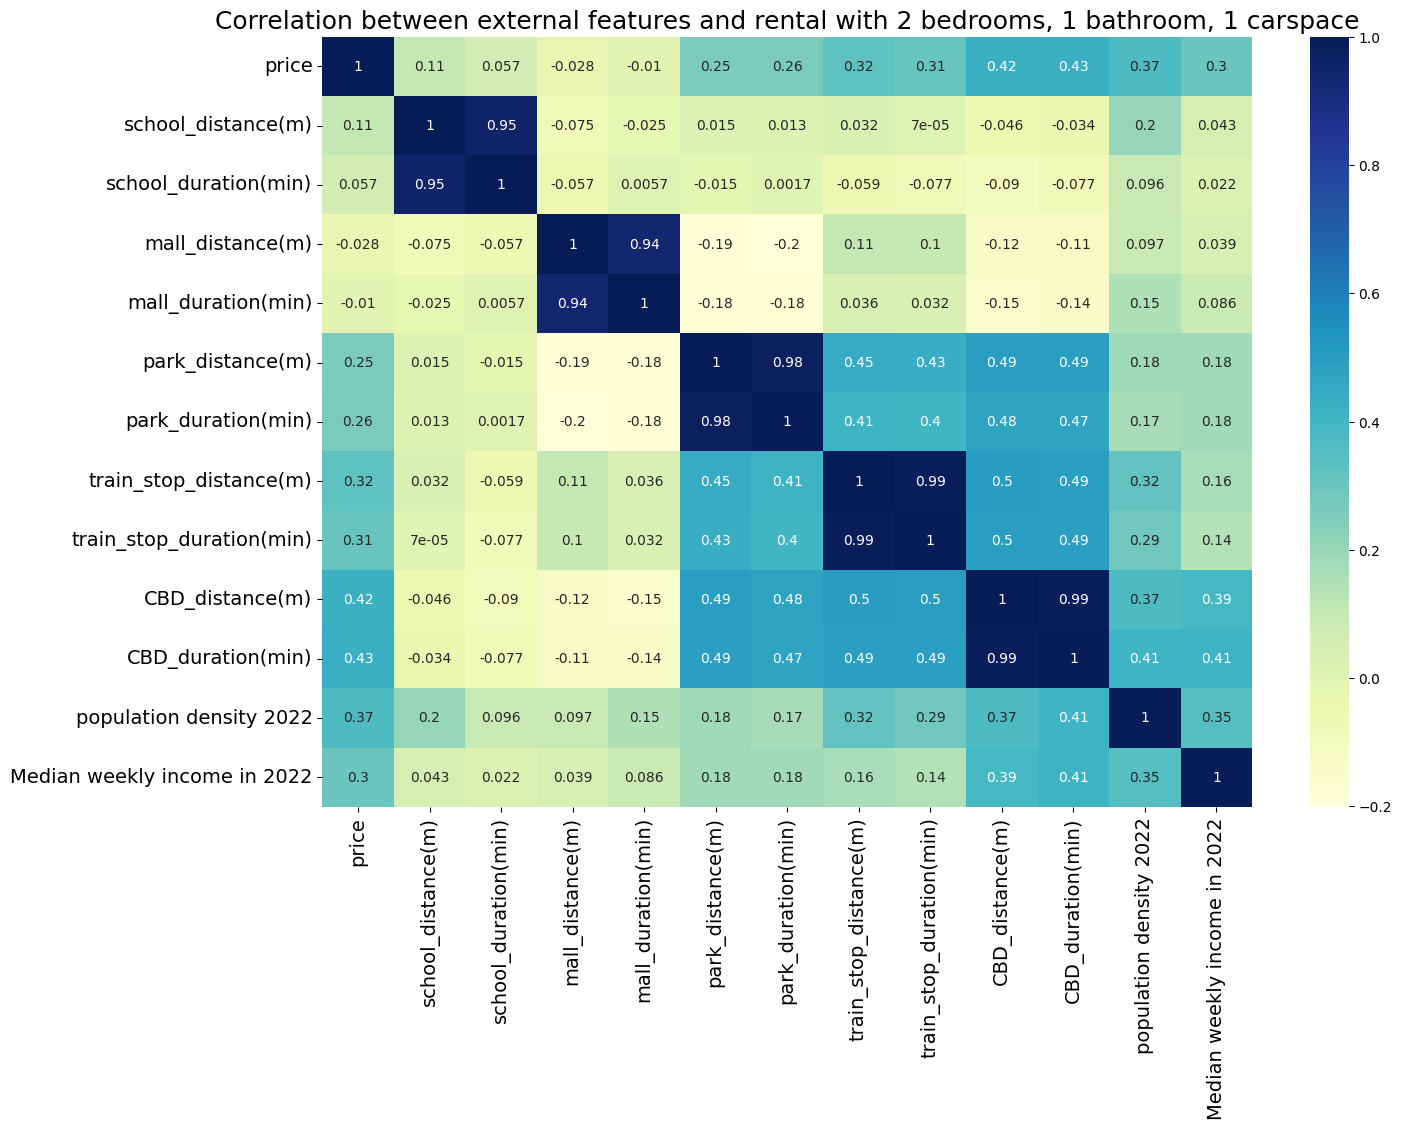

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Plot the data to see the correlation
cols = ["price", "school_distance(m)", "school_duration(min)", "mall_distance(m)", "mall_duration(min)", "park_distance(m)","park_duration(min)","train_stop_distance(m)","train_stop_duration(min)","CBD_distance(m)","CBD_duration(min)",'population density 2022','Median weekly income in 2022']
pcm = sns.heatmap(external_feature[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between external features and rental with 2 bedrooms, 1 bathroom, 1 carspace",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../plots/external_correlation.png")
plt.show()